From the useful sheets, we have to formalize a GRL problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import requests 
import io
import seaborn as sns

In [2]:
PATH = '../data/'
files = os.listdir(PATH)
dfs = {f[:-4] : pd.read_csv(PATH + f) 
           for f in files if f[-3:] == 'csv'
}

In [4]:
# All Users
# member_id is unique and reflected across all csvs (total 1207)
# all other things like DoB, IP, etc are most likely spoof
# Difference between name and member_title
# What is member_group_id?
# ID 4, 6, 10 are core moderators (from core_moderators)
dfs['core_members'].head(4);
core_members = dfs['core_members'][['member_id', 'name', 'member_title', 'member_posts']]

In [9]:
core_members.to_csv(PATH + 'modified/core_members.csv')

In [3]:
#3. 170 comments. comment_eid (event id?), comment_mid (member id?), 
#comment_text, 
# comment_author (string name) (doesn't match with any of member_title or name)
# might be useful to get some active users
# only comment_mid would be useful ig
dfs['calendar_event_comments'].head(4)

,comment_id,comment_eid,comment_mid,comment_date,comment_approved,comment_text,comment_append_edit,comment_edit_time,comment_edit_name,comment_ip_address,comment_author
0,1,150,7636,1459340746,1,<p>\n\tArriba Espana!\n</p>,0,0,NaN,69.121.225.238,Bogatyr
1,2,150,7508,1459538265,1,<p>\n\tIt's just a prank bro\n</p>,0,0,NaN,85.164.207.226,?✔️??????
2,3,150,0,1459545334,1,<p>\n\tHaving an armistice come out on April F...,0,0,beeblebrox,72.229.6.209,beeblebrox
3,4,154,7636,1460900209,1,<p>\n\tRest In Peace.\n</p>,0,0,NaN,69.121.225.238,Bogatyr


In [4]:
# 8066 follow connections
# follow_rel_id (?) and follow_member_id may be useful.
dfs['core_follow'].head(5)

,follow_id,follow_app,follow_area,follow_rel_id,follow_member_id,follow_is_anon,follow_added,follow_notify_do,follow_notify_meta,follow_notify_freq,follow_notify_sent,follow_visible,follow_index_id
0,fd493920fd57664677f50e16bf36b39f,forums,topic,36,12,0,1316119424,1,36.0,daily,1511158696,1,189544.0
1,1b179c39dd16a7955e2a258b6a2e51bc,forums,topic,62,12,0,1316153077,1,62.0,daily,1511158696,1,189525.0
2,af062e78edc9ce0a5ae29a453c626b3b,forums,topic,47,12,0,1316153350,1,47.0,daily,1511158696,1,189534.0
3,bbf8f01fcd2b2807471bd4b6152548b6,forums,topic,44,12,0,1316195666,1,44.0,daily,1511158696,1,189537.0
4,b85184cada616928c2b7c1669735e37a,forums,topic,65,12,0,1316196662,1,65.0,daily,1511158696,1,189522.0


In [33]:
dfs['core_follow'].follow_app.value_counts()

forums      7071
core         917
calendar      78
Name: follow_app, dtype: int64

In [34]:
dfs['core_follow'].follow_area.value_counts()

topic       6995
member       917
forum         76
event         72
calendar       6
Name: follow_area, dtype: int64

In [36]:
dfs['core_follow'].follow_rel_id.nunique(), dfs['core_follow'].follow_member_id.nunique()

(3957, 648)

In [32]:
min(dfs['core_members'].member_id), max(dfs['core_members'].member_id)

(1, 15218)

In [30]:
min(dfs['core_follow'].follow_rel_id), max(dfs['core_follow'].follow_rel_id)

(1, 15180)

In [31]:
min(dfs['core_follow'].follow_member_id), max(dfs['core_follow'].follow_member_id)

(1, 15193)

In [39]:
# Important. All Private Messages. Total 21715.
# msg_topic_id is the thread ID; each convo bw two users has its own thread/topic
# msg_author_id is the same as member_id in core_members
# msg_post is the first message in the thread, with HTML tags
dfs['core_message_posts'].head(3)

,msg_id,msg_topic_id,msg_date,msg_post,msg_post_key,msg_author_id,msg_ip_address,msg_is_first_post
0,1,1,1316144998,<p>The best first post to make on our forums i...,3320f7f06c422ef0fb77342724b4fd24,1,178.140.119.217,1
1,2,2,1316174048,\n<p>Who are we hosting this forum from?</p>\n...,9204e4883321af2275a37138d054a3f1,11,109.78.212.13,1
2,3,2,1316183999,<p>Crisis Host - they basically provide hostin...,12fd0309239711d02b39127de3502c51,1,178.140.119.217,0


In [7]:
#30. All Private Message Topics (total 4475)
# mt_id is same as msg_topic_id from core_message_posts
# mt_starter_id is the member_id of the person who put the first message on that topic
# mt_to_member_id is the member_id of the recipient of this private message
dfs['core_message_topics'].head(5)

,mt_id,mt_date,mt_title,mt_hasattach,mt_starter_id,mt_start_time,mt_last_post_time,mt_to_count,mt_to_member_id,mt_replies,mt_first_msg_id,mt_is_draft,mt_is_deleted,mt_is_system
0,1,1316144998,Introductions are important,0,1,1316144998,1316144998,1,23,0,1,0,1,0
1,2,1316174048,Our hosts,0,11,1316174047,1316187891,1,1,4,2,0,0,0
2,3,1316223829,Re: Nova Roma,0,16,1316223829,1316224790,1,14,1,7,0,1,0
3,5,1316528414,Introductions are important,0,1,1316528414,1316529737,1,20,1,12,0,1,0
4,6,1316700737,msn,0,1,1316700737,1316701077,1,11,1,14,0,1,0


In [8]:
#35. Pfields for each member. Total 1208. Could be used for node classification.
# dfs['core_pfields_content'].field_5[dfs['core_pfields_content'].field_5.isnull()]
# dfs['core_pfields_content'].field_5[190:196]
# print(sum(dfs['core_pfields_content'].field_5.isnull()))
# print(sum(dfs['core_pfields_content'].field_6.isnull()))
# print(sum(dfs['core_pfields_content'].field_7.isnull()))
# print(sum(dfs['core_pfields_content'].field_12.isnull()))
# print(sum(dfs['core_pfields_content'].field_13.isnull()))
# print(sum(dfs['core_pfields_content'].field_3.isnull()))
dfs['core_pfields_content'].head(10)

,member_id,field_3,field_5,field_6,field_7,field_11,field_12,field_1,field_13
0,1,NaN,Male,Third Rome,NaN,FASCISM,NaN,NaN,NaN
1,2,NaN,Male,NaN,NaN,Out of context Mussolini quote proving Fascism...,NaN,NaN,NaN
2,3,NaN,Male,Dixie,"Muay Thai, surfing, running, lifting, guns, vi...",≠,NaN,NaN,NaN
3,4,http://bigbustycoons.com,Male,Babylon,You,Theonomy,\n<p>\n\tDefinitely not a woman.\n</p>\n\n<p>\...,NaN,NaN
4,5,NaN,Male,Great Britain,"Politics, history, science fiction, target sho...",Republican Fascism,NaN,NaN,NaN
5,7,NaN,Male,United Kingdom,NaN,Post-Irony,NaN,NaN,NaN
6,8,NaN,Male,NaN,NaN,Syndicalist Futurism,<p>\n\tEarly Revolutionary Style Fascist/Futur...,NaN,NaN
7,9,NaN,Female,AWOL,NaN,Classic Fascism,NaN,NaN,NaN
8,11,NaN,Male,Ireland,NaN,Fascist-esque opposition to the modern world.,NaN,NaN,NaN
9,12,NaN,Not Telling,NaN,NaN,Integralism,NaN,NaN,NaN


In [9]:
#43. Important. All Posts. Total 196042.
# index_content has the post content.
# index_author is the member_id of the authon of that post.
dfs['core_search_index'].head(4)

,index_class,index_id,index_object_id,index_item_id,index_container_id,index_content,index_permissions,index_author,index_title,index_date_created,index_date_updated,index_hidden,index_item_index_id,index_item_author,index_is_last_comment,index_class_type_id_hash,index_container_class,index_club_id
0,IPS\core\Statuses\Status,1,3053,3053,9446,"Congrats on 1,488",*,11235,"\n\tCongrats on 1,488\n",1501260017,1501260017,0,1,11235,1,9ae3c7e6c7448630db1cf3816f97d7aa,IPS\Content\Search\_Index,NaN
1,IPS\core\Statuses\Status,2,3051,3051,9622,I approve of this avatar.,*,6269,\n\tI approve of this avatar.\n,1498632014,1498632014,0,2,6269,1,b619e99d90c1881a384878251917ae2b,IPS\Content\Search\_Index,NaN
2,IPS\core\Statuses\Status,3,3050,3050,14382,"I have more reputation than u, fag",*,13893,"\n\tI have more reputation than u, fag\n",1498114162,1498114162,0,3,13893,1,0f68c7794e042fb6bae1fd80af379c33,IPS\Content\Search\_Index,NaN
3,IPS\core\Statuses\Status,4,3049,3049,9872,"Hi Rostislav, \ndanke für den Willkommensgrus...",*,14568,"Hi Rostislav,\ndanke für den Willkommensgruss....",1497550215,1497550215,0,4,14568,1,cd7bd28b3f19848b72a7ad7feb1b9fb0,IPS\Content\Search\_Index,NaN


In [40]:
min(dfs['core_search_index'].index_author), max(dfs['core_search_index'].index_author)

(0, 15201)

In [10]:
#75. Useful. Notification Graph could give us very informative edges.
# from notify_from_id to notify_to_id based on notify_type_key
# and notify_type_key could be a nice edge feature
dfs['orig_inline_notifications'].notify_type_key.value_counts();
dfs['orig_inline_notifications'].head(5)

,notify_id,notify_to_id,notify_sent,notify_read,notify_title,notify_text,notify_from_id,notify_type_key,notify_url,notify_meta_app,notify_meta_area,notify_meta_id,notify_meta_key
0,333021,9679,1451057630,1,<a href='http://ironmarch.org/index.php?/user/...,Hello!\n\nBolesnik just liked a post you made!...,9267,new_likes,http://ironmarch.org/index.php?/topic/5385-ukr...,NaN,NaN,0,NaN
1,333022,6260,1451059824,1,<a href='http://ironmarch.org/index.php?/user/...,"Haggis,\n\nAberfoyle has replied to a personal...",9327,reply_private_message,http://ironmarch.org/index.php?app=members&mod...,members,pm,3903,3908661d5069ac5f339318007422057d
2,333023,9679,1451060512,1,<a href='http://ironmarch.org/index.php?/user/...,"Vinokura,\n\nRaven (http://ironmarch.org/index...",8232,followed_topics,http://ironmarch.org/index.php?/topic/5652-tru...,forums,topics,5652,c8c841e80c748e31883b1ab076e5dc45
3,333024,1,1451060542,1,<a href='http://ironmarch.org/index.php?/user/...,Hello!\n\nDer Werwolf just liked a post you ma...,6249,new_likes,http://ironmarch.org/index.php?/topic/3382-woa...,NaN,NaN,0,NaN
4,333025,1558,1451060995,1,<a href='http://ironmarch.org/index.php?/user/...,Hello!\n\nBucketoflemons just liked a post you...,9217,new_likes,http://ironmarch.org/index.php?/topic/5809-wou...,NaN,NaN,0,NaN


In [11]:
#76. 763 Original members.

# check if all orig members have emails filled in
sum(dfs['orig_members'].email.isnull()) # (== 0) = True

orig_members = [name for name in dfs['orig_members'].name]
core_members = [name for name in dfs['core_members'].name]

print('based on username')
print(len(core_members), len(orig_members))

print(round(np.mean([
    user in core_members
    for user in orig_members
]), 2),
     '= fraction of orig members in core members.')

print(round(np.mean([
    user in orig_members
    for user in core_members
]), 2),
     '= fraction of core members in orig members.')

print('based on member_id')
orig_members = [user for user in dfs['orig_members'].member_id]
core_members = [user for user in dfs['core_members'].member_id]

print(len(core_members), len(orig_members))

print(round(np.mean([
    user in core_members
    for user in orig_members
]), 2),
     '= fraction of orig members in core members.')

print(round(np.mean([
    user in orig_members
    for user in core_members
]), 2),
     '= fraction of core members in orig members.')

based on username
1207 763
0.44 = fraction of orig members in core members.
0.28 = fraction of core members in orig members.
based on member_id
1207 763
0.56 = fraction of orig members in core members.
0.35 = fraction of core members in orig members.


In [12]:
#78. Useful. But don't fully understand.
# Mapping from user_id to topic_id, might help connect users.
dfs['orig_message_topic_user_map'].head(4)
# TODO:
# Check if users following the same topic are same in 
# this map and core_message_topics and orig_message_topics

,map_id,map_user_id,map_topic_id,map_folder_id,map_read_time,map_user_active,map_user_banned,map_has_unread,map_is_system,map_is_starter,map_left_time,map_ignore_notification,map_last_topic_reply
0,1,23,1,myconvo,1320389586,1,0,0,0,0,0,0,1316144998
1,2,1,1,myconvo,1316528378,0,0,0,0,1,0,0,1316144998
2,3,1,2,myconvo,1316187985,0,0,0,0,0,0,0,1316187891
3,4,11,2,myconvo,1316491418,1,0,0,0,1,0,0,1316187891


In [78]:
# reference with topic_title and compare the topic_id v topic_title mapping of both
# orig and core
ids = 0
for i in range(len(dfs['orig_message_topics'].mt_title)):
    if dfs['orig_message_topics'].mt_title[i] == dfs['core_message_topics'].mt_title[i]:
        ids += 1
print(ids)

1160


In [79]:
len(dfs['orig_message_topics'].mt_title), len(dfs['core_message_topics'].mt_title)

(3101, 4475)

In [13]:
#79 All Orig Message Topics (total 3101)
# mt_id is same as map_topic_id from orig_message_topic_user_map
# mt_starter_id is the member_id of the person who put the first message on that topic
# mt_to_member_id is the member_id of the recipient of this message
dfs['orig_message_topics'].head(5)

,mt_id,mt_date,mt_title,mt_hasattach,mt_starter_id,mt_start_time,mt_last_post_time,mt_invited_members,mt_to_count,mt_to_member_id,mt_replies,mt_last_msg_id,mt_first_msg_id,mt_is_draft,mt_is_deleted,mt_is_system
0,1,1316144998,Introductions are important,0,1,1316144998,1316144998,a:0:{},0,23,0,1,1,0,1,0
1,2,1316174048,Our hosts,0,11,1316174047,1316187891,a:0:{},0,1,4,6,2,0,0,0
2,3,1316223829,Re: Nova Roma,0,16,1316223829,1316224790,a:0:{},0,14,1,8,7,0,1,0
3,5,1316528414,Introductions are important,0,1,1316528414,1316529737,a:0:{},0,20,1,13,12,0,1,0
4,6,1316700737,msn,0,1,1316700737,1316701077,a:0:{},0,11,1,15,14,0,1,0


In [14]:
#82. pfields of 764 members. Might help in node features.
dfs['orig_pfields_content'].head(3)

,member_id,field_1,field_2,field_3,field_4,field_5,field_6,field_7,field_8,field_9,field_10,field_11
0,1,NaN,NaN,NaN,NaN,m,Third Rome,NaN,NaN,NaN,NaN,FASCISM
1,2,NaN,NaN,NaN,NaN,m,NaN,NaN,NaN,NaN,NaN,Out of context Mussolini quote proving Fascism...
2,3,NaN,NaN,NaN,NaN,m,Dixie,"Working out, guns, video games, reading, coffe...",NaN,NaN,NaN,â‰


In [41]:
# What is reputation? Total 141550
# 635 users have a reputation index, could be used for node classification or features?
members = set(dfs['orig_reputation_index'].member_id)
# print(members)
freq = [[m, sum(dfs['orig_reputation_index'].member_id == m)]
       for m in members]
# dfs['orig_reputation_index'].head(3)
freq_sort = sorted(freq, key = lambda z: z[1], reverse=True)

In [49]:
freq_sorted = pd.DataFrame(freq_sort)

In [61]:
i = 0
while freq_sorted[1][i] > 30:
    i += 1
print(i)
print(len(freq_sorted[1]) - i)

321
314


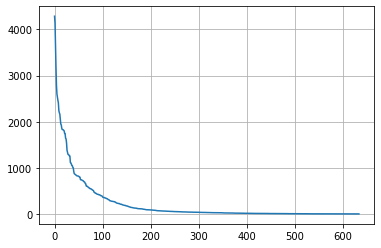

In [53]:
plt.plot(freq_sorted[1])
plt.grid()